## Dataset: https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+exposed+to+turbulent+gas+mixtures 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [9]:
data_dir = "/Users/phuongnh10/Documents/02-CEP/06-Agilent/05-Code/dataset_two_gas_sources_/dataset_twosources_raw" 

In [16]:
files = sorted(glob(data_dir + "/*"))
print("Number of samples: " + str(len(files)))

Number of samples: 180


In [23]:
data = pd.read_csv(files[0], header=None)
data.columns = ['Time (s)', 'Temperature (oC)', 'Relative Humidity (%)', 'TGS2600', 'TGS2602-1', 'TGS2602-2', 'TGS2620-1', 'TGS2612', 'TGS2620-2', 'TGS2611', 'TGS2610']
data.head()

,Time (s),Temperature (oC),Relative Humidity (%),TGS2600,TGS2602-1,TGS2602-2,TGS2620-1,TGS2612,TGS2620-2,TGS2611,TGS2610
0,1.92,22.46,40.7,331.0,275.0,518.0,572.0,566.0,700.0,629.0,719.0
1,1.94,22.46,40.7,331.0,274.0,518.0,572.0,565.0,700.0,630.0,719.0
2,1.96,22.46,40.7,331.0,274.0,519.0,572.0,566.0,700.0,629.0,719.0
3,1.98,22.46,40.7,331.0,274.0,518.0,572.0,566.0,700.0,629.0,719.0
4,2.00,22.46,40.7,331.0,274.0,518.0,571.0,566.0,700.0,630.0,719.0


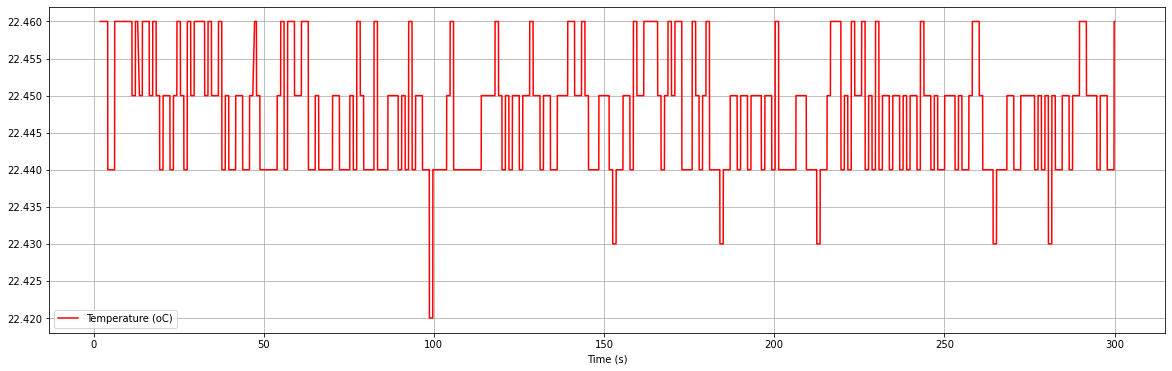

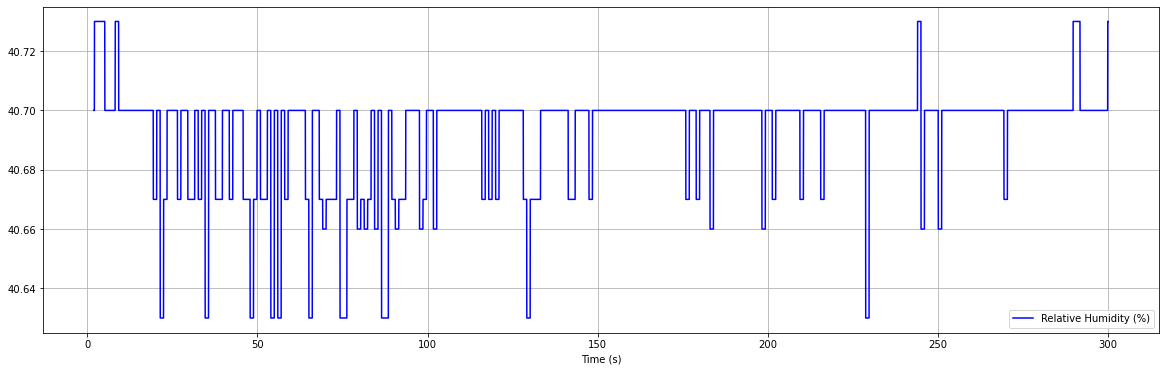

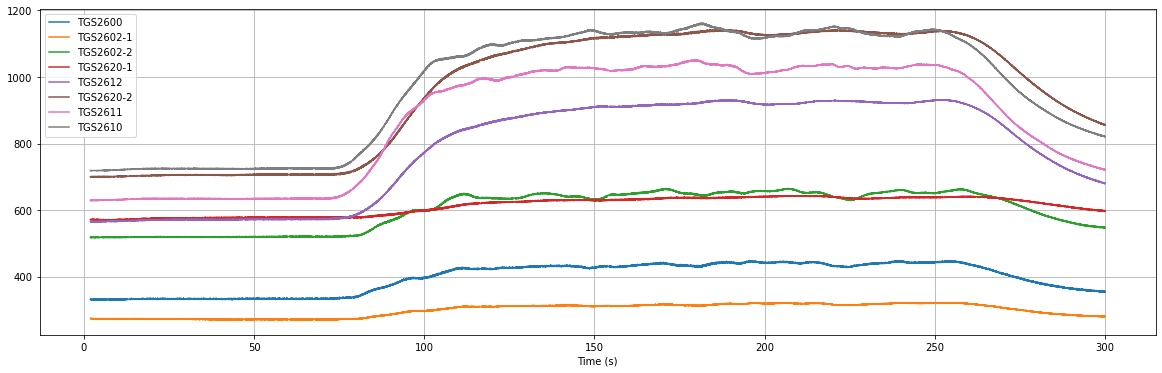

In [33]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='Temperature (oC)', color='red', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='Relative Humidity (%)', color='blue', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='TGS2600', ax=ax)
data.plot(x='Time (s)', y='TGS2602-1', ax=ax)
data.plot(x='Time (s)', y='TGS2602-2', ax=ax)
data.plot(x='Time (s)', y='TGS2620-1', ax=ax)
data.plot(x='Time (s)', y='TGS2612', ax=ax)
data.plot(x='Time (s)', y='TGS2620-2', ax=ax)
data.plot(x='Time (s)', y='TGS2611', ax=ax)
data.plot(x='Time (s)', y='TGS2610', ax=ax)
plt.grid()
plt.show()

## Dataset: https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+under+dynamic+gas+mixtures#

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_path = "D:/00. FSOFT/01. Project/AIML/02. Gas Leak Detection POC/Source code/Notebook/data/"
co_filename = "ethylene_CO.txt"
methane_filename = "ethylene_methane.txt"

In [4]:
# ethylene methane (EM) data 
# 'ethylene_CO.txt': contains the recordings from the sensors when exposed to mixtures of Ethylene and CO in air.
em_df = pd.read_csv(os.path.join(data_path, methane_filename), skiprows=1, header=None, delim_whitespace=True)
em_df.columns = ['Time', 'Methane_conc', 'Ethylene_conc', 
                 'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 
                 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
                 'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 
                 'TGS2610-3', 'TGS2610-4', 'TGS2620-3', 'TGS2620-4']
print("Number of samples: ", em_df.shape[0])
em_df.head()

Number of samples:  4178504


,Time,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


### Visualize raw data

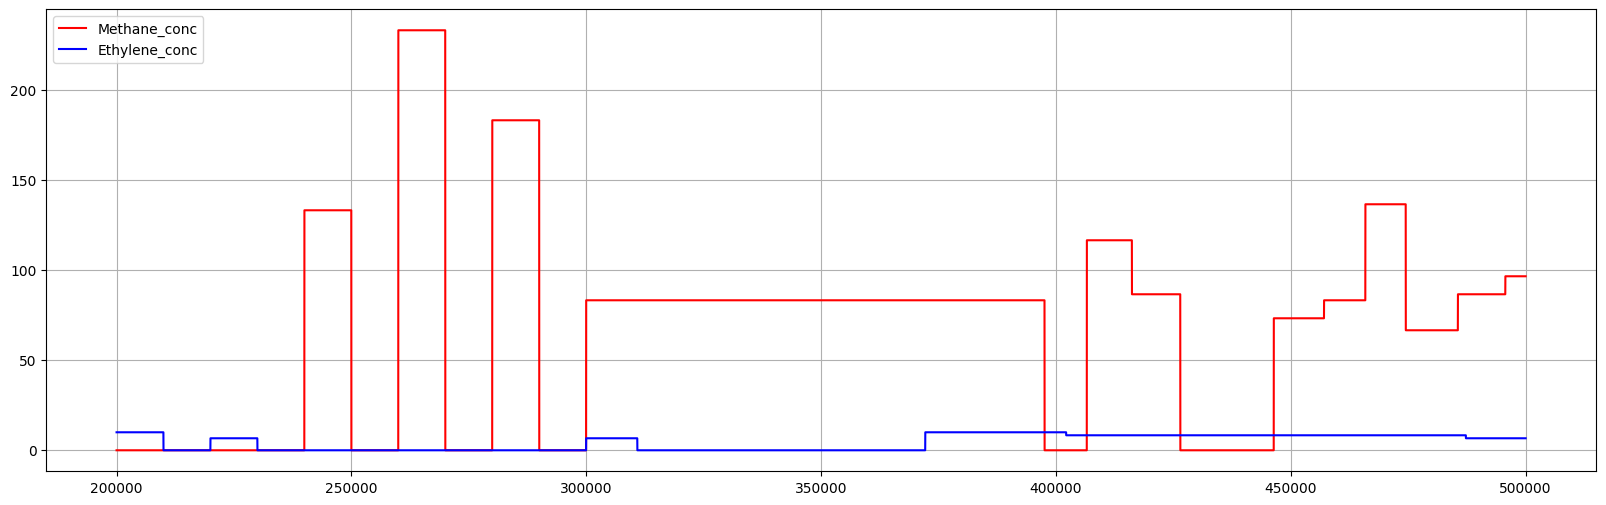

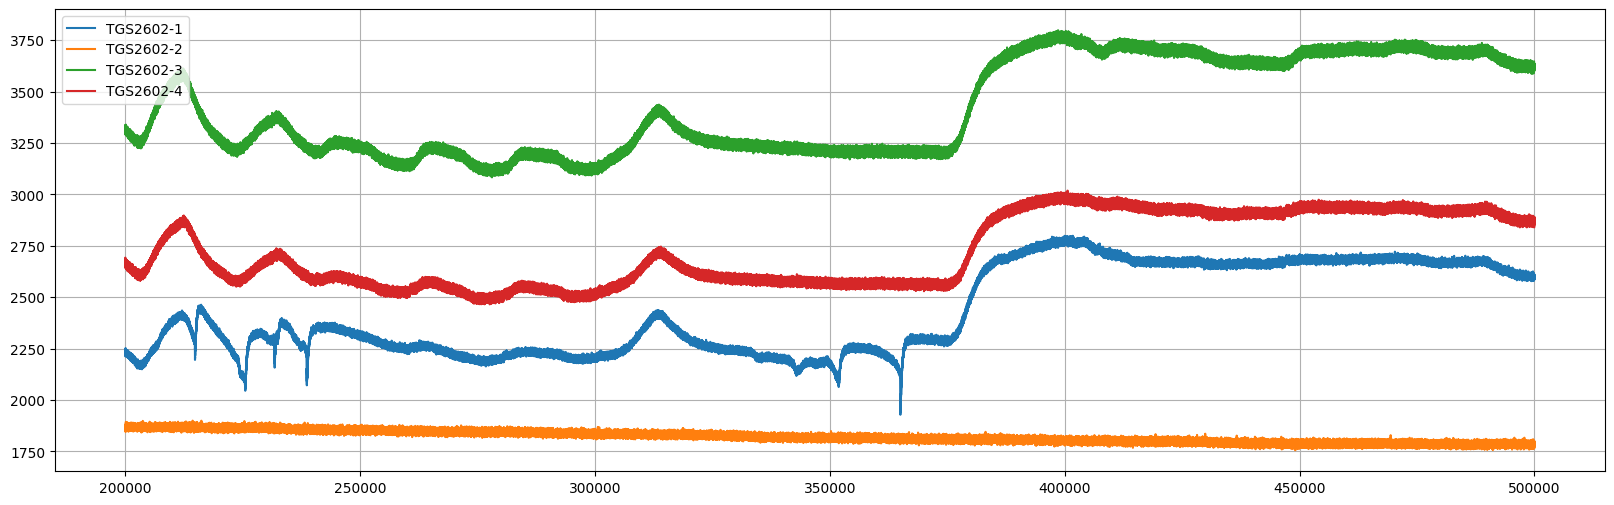

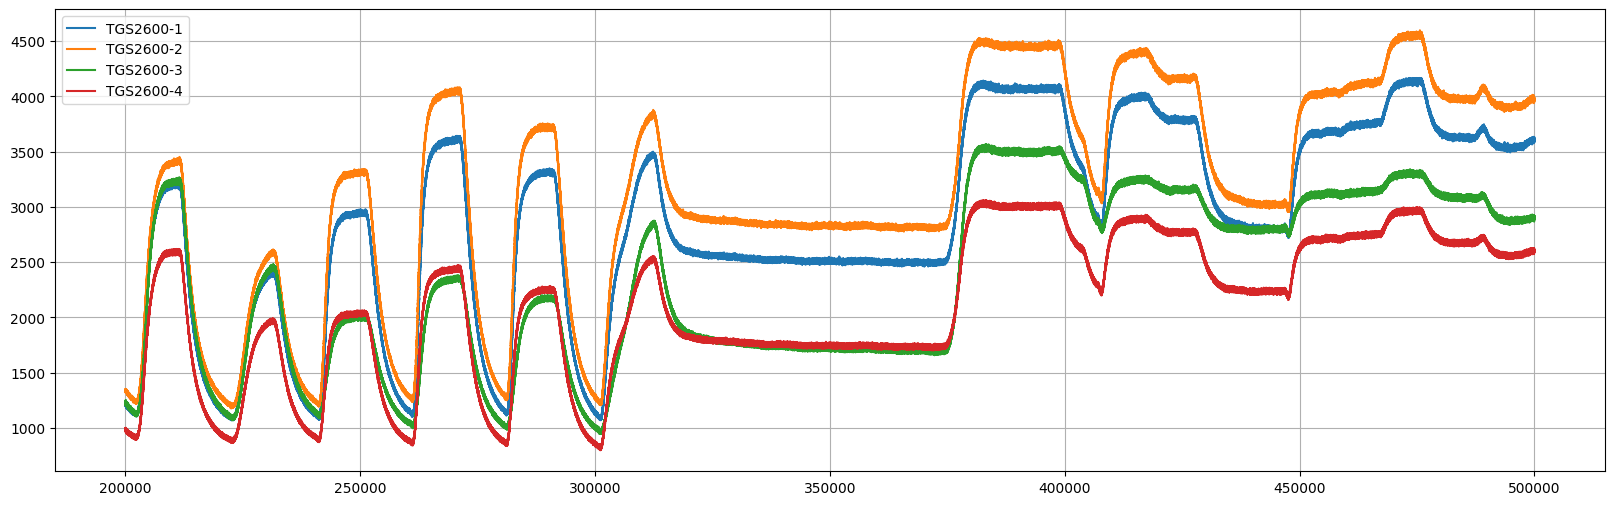

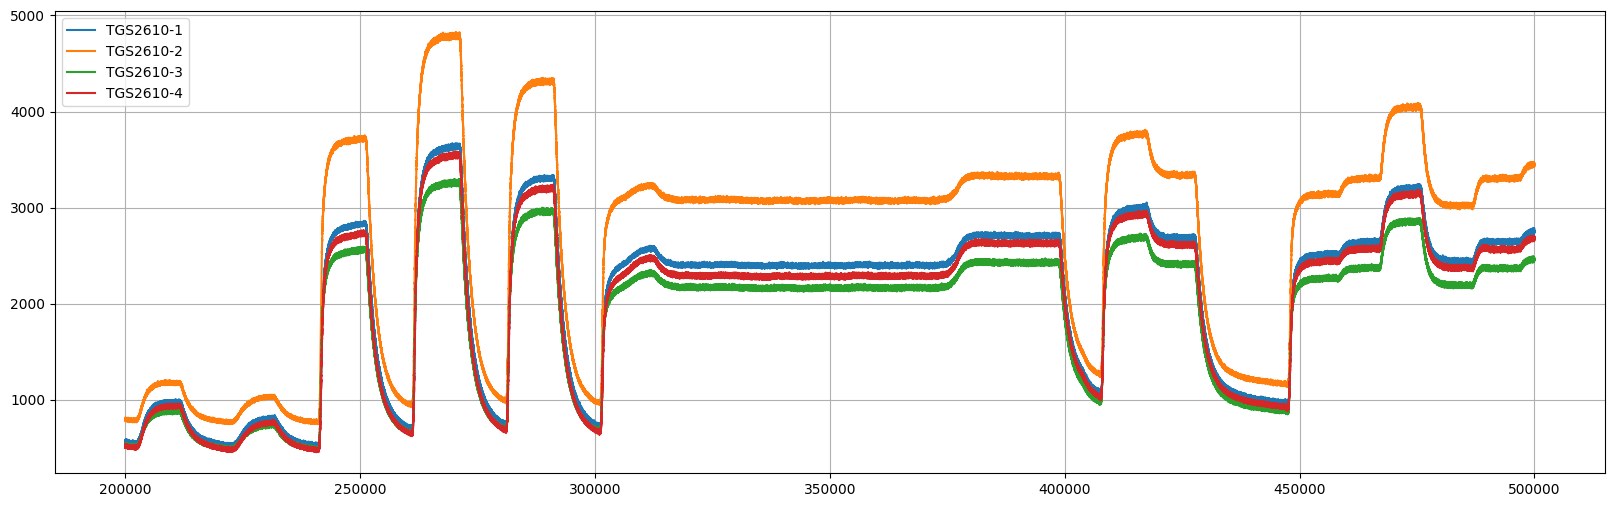

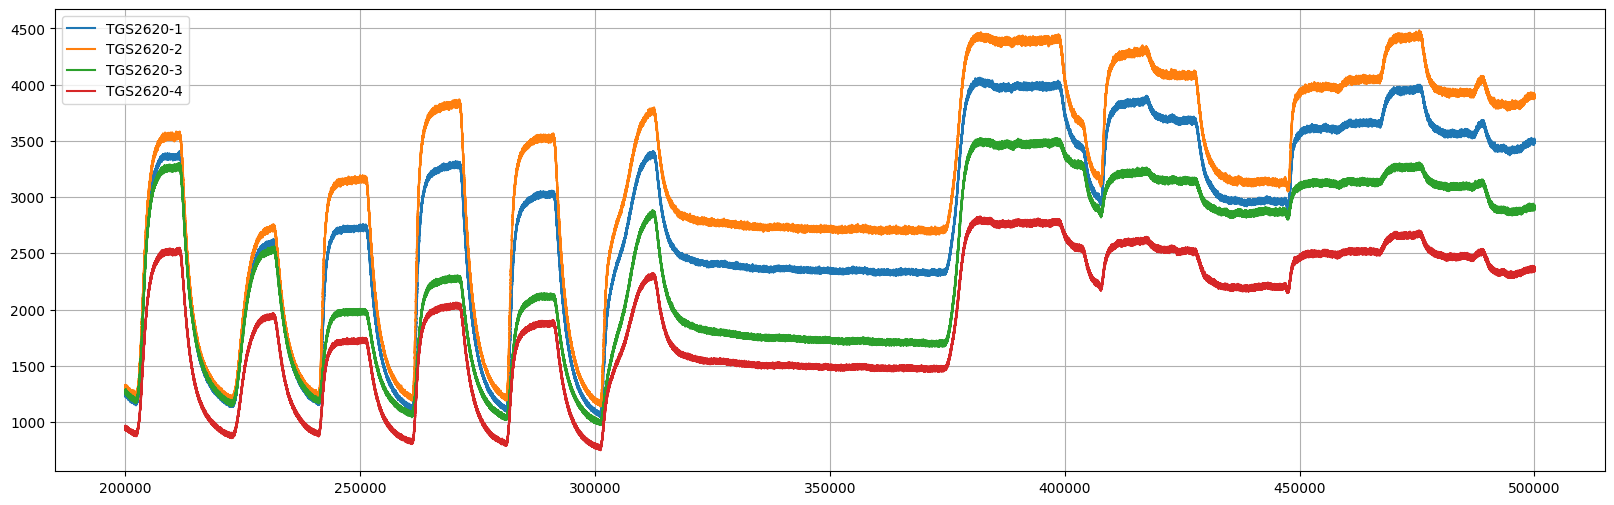

In [5]:
start = 200000
end = 500000


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
em_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2602-1', ax=ax)
em_df[start:end].plot(y='TGS2602-2', ax=ax)
em_df[start:end].plot(y='TGS2602-3', ax=ax)
em_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2600-1', ax=ax)
em_df[start:end].plot(y='TGS2600-2', ax=ax)
em_df[start:end].plot(y='TGS2600-3', ax=ax)
em_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2610-1', ax=ax)
em_df[start:end].plot(y='TGS2610-2', ax=ax)
em_df[start:end].plot(y='TGS2610-3', ax=ax)
em_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2620-1', ax=ax)
em_df[start:end].plot(y='TGS2620-2', ax=ax)
em_df[start:end].plot(y='TGS2620-3', ax=ax)
em_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [6]:
# create timedate index 
processed_df = em_df
processed_df["Time"] = pd.to_timedelta(processed_df["Time"], unit='s')
processed_df = processed_df.set_index('Time')

# min-max normalization
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(processed_df.values)
scaled_df = pd.DataFrame(scaled_df, columns=processed_df.columns)
scaled_df.index = processed_df.index

# downsampling to 1 second interval
scaled_df = scaled_df.resample('10s').mean()

print("Number of samples after normalization: ", scaled_df.shape[0])
scaled_df.head()

Number of samples after normalization:  4180


,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
Time,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.339637,0.060391,0.435042,0.435135,0.511181,0.498301,0.432443,0.460782,0.316347,0.314575,0.800928,0.978773,0.981738,0.985838,0.728225,0.797471
0 days 00:00:10,0.0,0.0,0.741987,0.059962,0.967936,0.967795,0.960037,0.933427,0.853896,0.884382,0.337800,0.337290,0.745586,0.914576,0.942582,0.949830,0.678306,0.756541
0 days 00:00:20,0.0,0.0,0.747490,0.058871,0.815642,0.814185,0.743564,0.730451,0.701129,0.705304,0.376451,0.380658,0.638549,0.775039,0.650297,0.673701,0.546274,0.609772
0 days 00:00:30,0.0,0.0,0.729775,0.057809,0.629475,0.626960,0.503826,0.493271,0.521788,0.514185,0.380876,0.396247,0.486890,0.570589,0.400419,0.410875,0.385965,0.420793
0 days 00:00:40,0.0,0.0,0.710372,0.056787,0.494844,0.491047,0.372685,0.363990,0.414771,0.406574,0.353459,0.376962,0.366393,0.416752,0.268932,0.271548,0.287924,0.305378


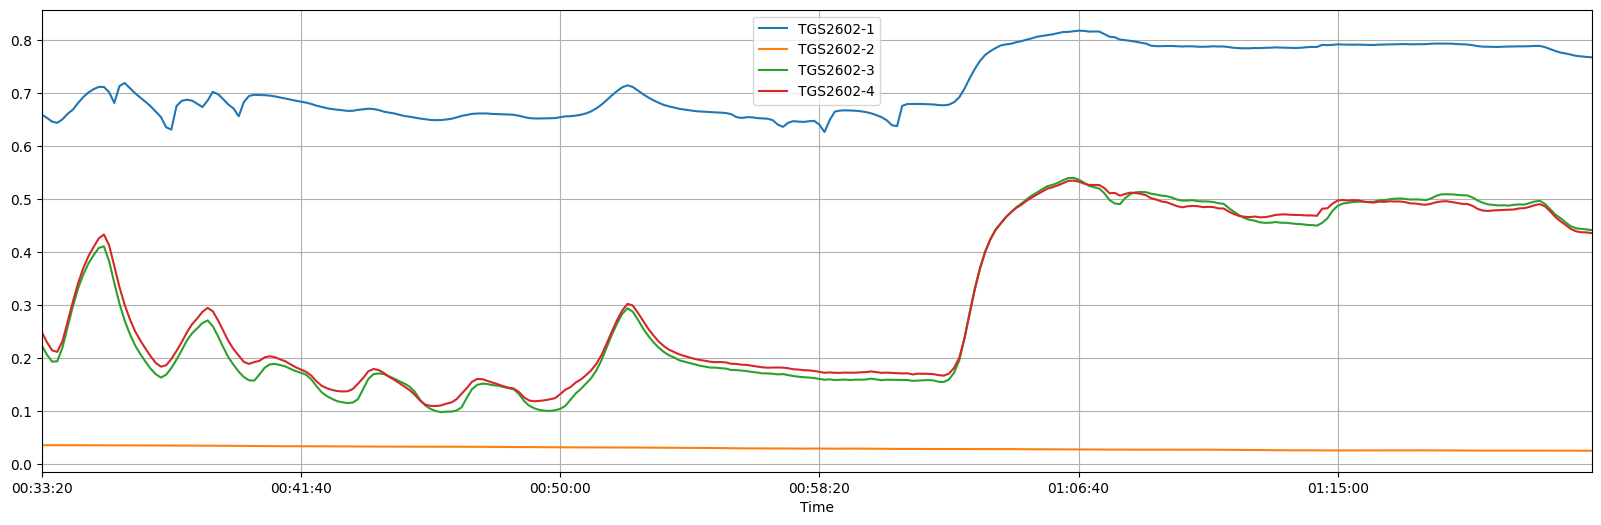

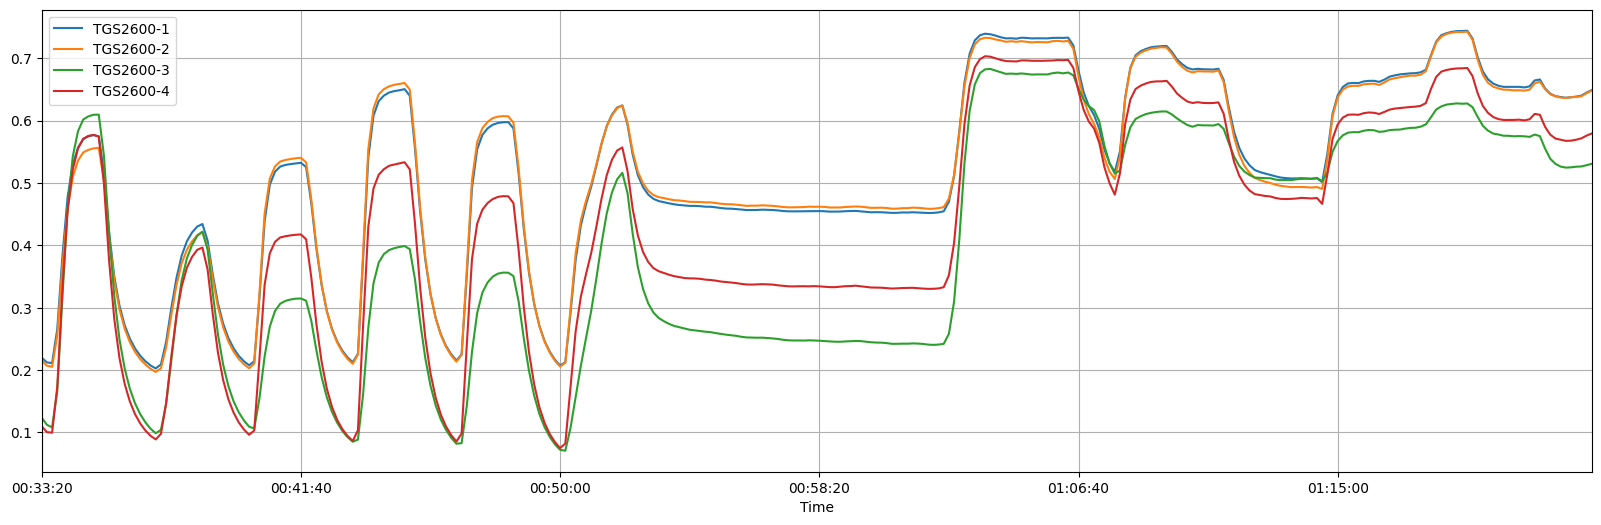

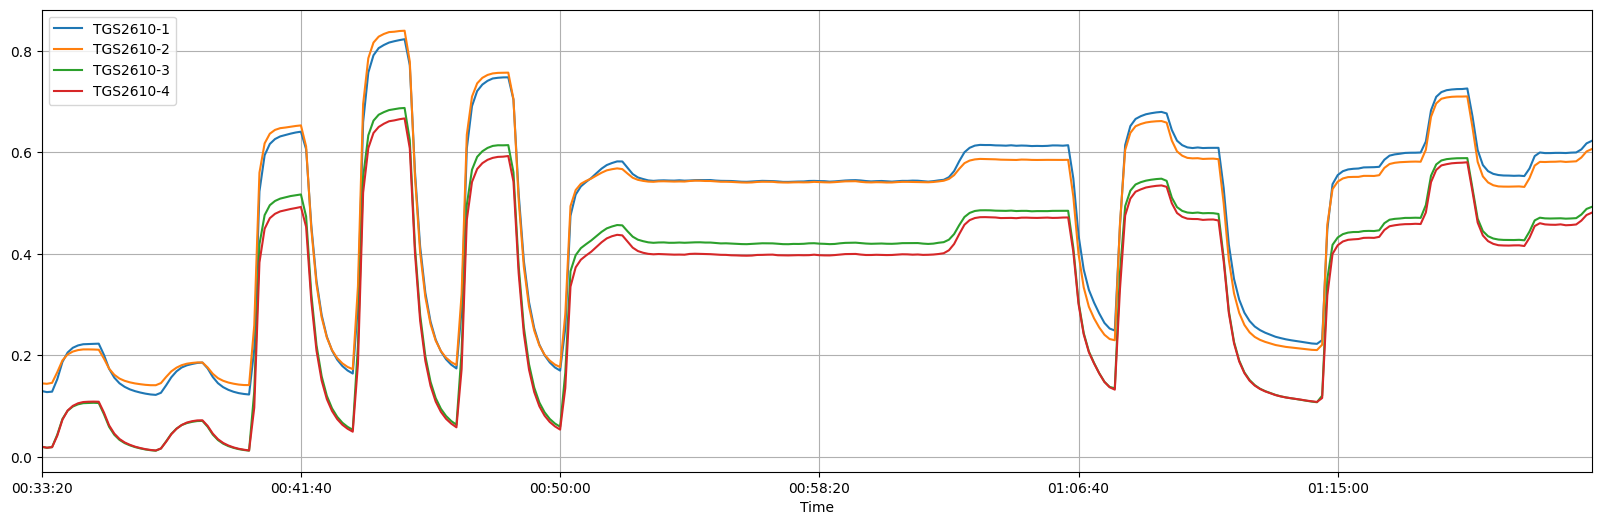

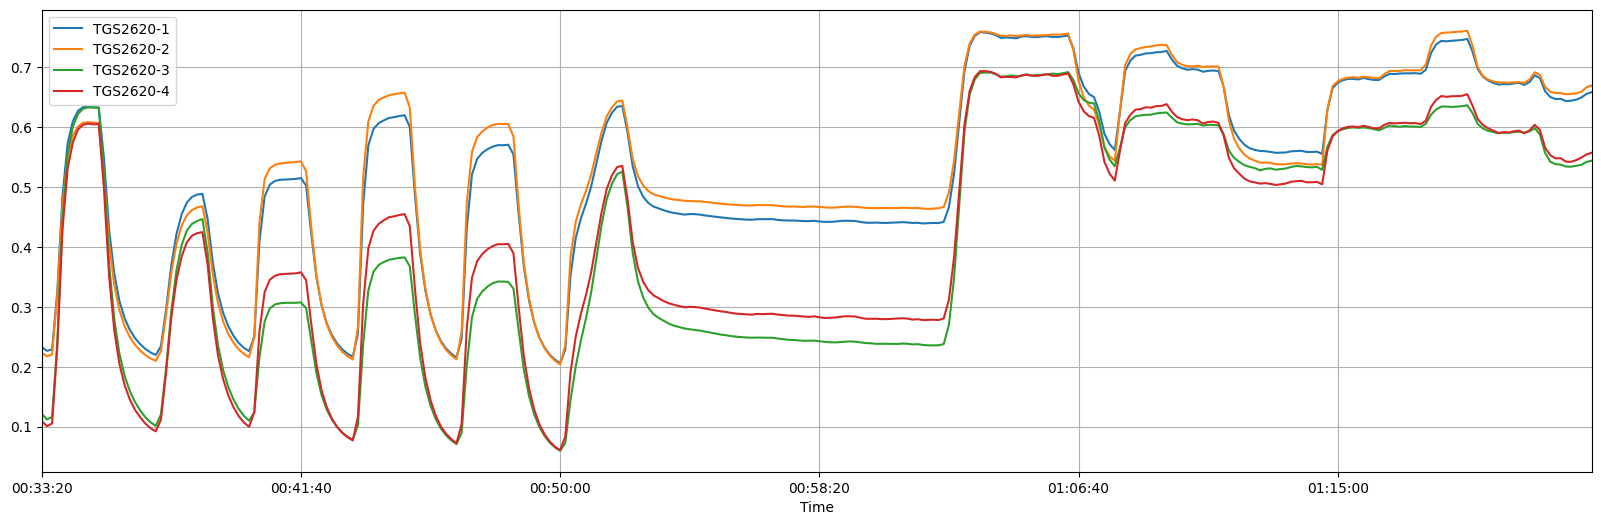

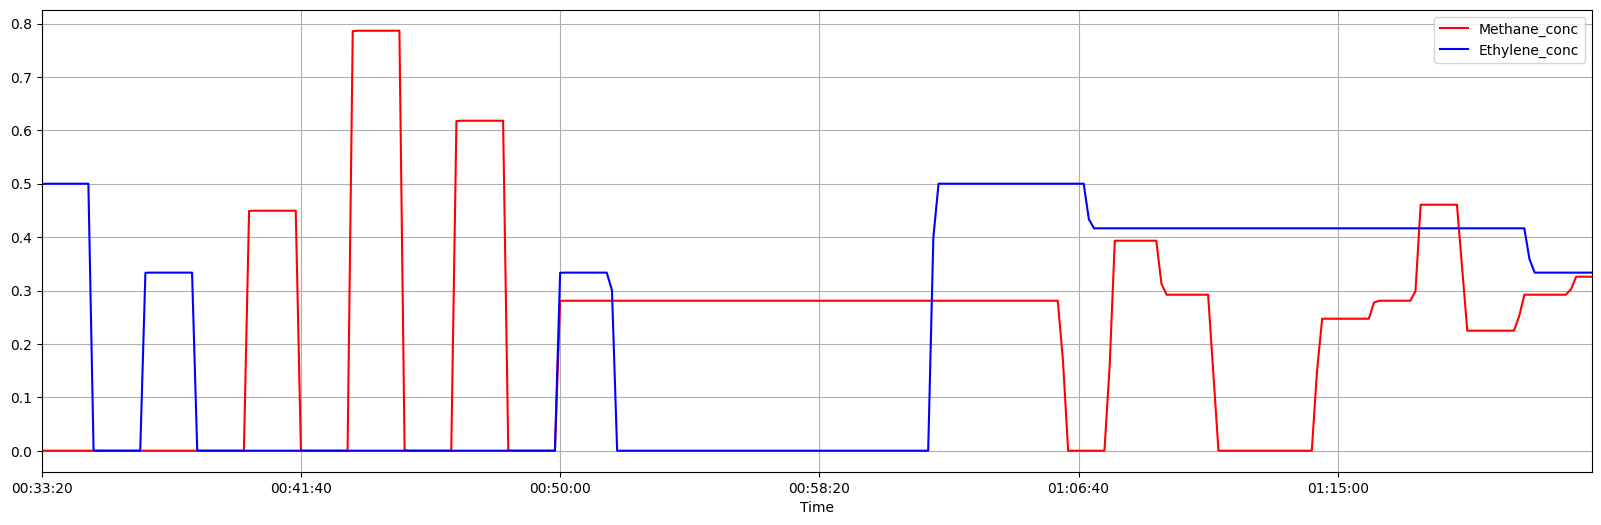

In [9]:
start = 200
end = 500


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2602-1', ax=ax)
scaled_df[start:end].plot(y='TGS2602-2', ax=ax)
scaled_df[start:end].plot(y='TGS2602-3', ax=ax)
scaled_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2600-1', ax=ax)
scaled_df[start:end].plot(y='TGS2600-2', ax=ax)
scaled_df[start:end].plot(y='TGS2600-3', ax=ax)
scaled_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2610-1', ax=ax)
scaled_df[start:end].plot(y='TGS2610-2', ax=ax)
scaled_df[start:end].plot(y='TGS2610-3', ax=ax)
scaled_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2620-1', ax=ax)
scaled_df[start:end].plot(y='TGS2620-2', ax=ax)
scaled_df[start:end].plot(y='TGS2620-3', ax=ax)
scaled_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
scaled_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.grid()
plt.show()

In [11]:
scaled_df['Label'] = 0

In [12]:
scaled_df.head()

,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4,label,Label
Time,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.339637,0.060391,0.435042,0.435135,0.511181,0.498301,0.432443,0.460782,0.316347,0.314575,0.800928,0.978773,0.981738,0.985838,0.728225,0.797471,0,0
0 days 00:00:10,0.0,0.0,0.741987,0.059962,0.967936,0.967795,0.960037,0.933427,0.853896,0.884382,0.337800,0.337290,0.745586,0.914576,0.942582,0.949830,0.678306,0.756541,0,0
0 days 00:00:20,0.0,0.0,0.747490,0.058871,0.815642,0.814185,0.743564,0.730451,0.701129,0.705304,0.376451,0.380658,0.638549,0.775039,0.650297,0.673701,0.546274,0.609772,0,0
0 days 00:00:30,0.0,0.0,0.729775,0.057809,0.629475,0.626960,0.503826,0.493271,0.521788,0.514185,0.380876,0.396247,0.486890,0.570589,0.400419,0.410875,0.385965,0.420793,0,0
0 days 00:00:40,0.0,0.0,0.710372,0.056787,0.494844,0.491047,0.372685,0.363990,0.414771,0.406574,0.353459,0.376962,0.366393,0.416752,0.268932,0.271548,0.287924,0.305378,0,0


In [13]:
scaled_df.columns 

Index(['Methane_conc', 'Ethylene_conc', 'TGS2602-1', 'TGS2602-2', 'TGS2600-1',
       'TGS2600-2', 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
       'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 'TGS2610-3',
       'TGS2610-4', 'TGS2620-3', 'TGS2620-4', 'label', 'Label'],
      dtype='object')

In [ ]:
#  Label = 0,1,2,3 => air(0) ~ Methane_conc = 0 & Ethylene_conc =0
#                     Methane(1) ~ Methan >0, Ethy =0
#                     Ethane(2) ~ ethan >0, Methy =0
#                     Mix(3) ~ ethan >0, Methy =>

In [20]:
df_new = scaled_df.filter(['Methane_conc', 'Ethylene_conc','Label'], axis=1)
df_new

,Methane_conc,Ethylene_conc,Label
Time,,,
0 days 00:00:00,0.0,0.0,0
0 days 00:00:10,0.0,0.0,0
0 days 00:00:20,0.0,0.0,0
0 days 00:00:30,0.0,0.0,0
0 days 00:00:40,0.0,0.0,0
...,...,...,...
0 days 11:35:50,0.0,0.0,0
0 days 11:36:00,0.0,0.0,0
0 days 11:36:10,0.0,0.0,0


In [29]:
 df_new['Methane_conc'].values 

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
conditions = [
    (df_new['Methane_conc'] == 0) & (df_new['Ethylene_conc'] == 0) ,
    (df_new['Methane_conc'] > 0) & (df_new['Ethylene_conc'] == 0),
    (df_new['Methane_conc'] == 0) & (df_new['Ethylene_conc'] > 0),
    (df_new['Methane_conc'] > 0) & (df_new['Ethylene_conc'] > 0),
    ]

labels = [0,1,2,3]
   
df_new['Label'] = np.select(conditions, labels, default='flat')

In [49]:
df_new.Label.value_counts()

0    1276
1    1036
2     982
3     886
Name: Label, dtype: int64

In [54]:
df_new.to_csv('test.csv')

In [52]:
df_label = df_new.Label
df_label 

Time
0 days 00:00:00    0
0 days 00:00:10    0
0 days 00:00:20    0
0 days 00:00:30    0
0 days 00:00:40    0
                  ..
0 days 11:35:50    0
0 days 11:36:00    0
0 days 11:36:10    0
0 days 11:36:20    0
0 days 11:36:30    0
Freq: 10S, Name: Label, Length: 4180, dtype: object

In [53]:
df_label.to_csv('label_data.csv')